## Quality assessment of academic website using sampling technique

### The website in question is [http://www.du.ac.in](http://www.du.ac.in)

Author: Anjali Suman

### Psuedo code employed in this analysis

- Using Simple Random Sampling Without Replacement, we collected a sample of 105 participants. For this step, we essentially sent [this](https://forms.gle/XethFunD8SvV4wVb9) questionnaire and asked the participants to fill it up. We received 105 responses.
- Import the dataset
- Choose 20% of the dataset as the sample. We do this again using random sampling without replacement. We do this using the `sample` function in pandas.
- Then we use [one proportion Z test](https://vitalflux.com/one-proportion-z-test-formula-examples/) to test the hypothesis that the proportion of people who think that the website is good at 5\% significance level.
- For this one proportion Z test, we use the following formula:
    - Z = (p - p0) / sqrt(p0 * (1 - p0) / n)
    - where p is the proportion of people who think that the website is good, p0 is the hypothesized proportion of people who think that the website is good and n is the sample size.

- We then use the [Z table](https://www.statisticshowto.com/probability-and-statistics/z-table/) to find the critical value of Z for 5\% level of significance to find $Z_{0.025}$. Here, we get $Z_{0.025} = 1.96$.
- We then compare the value of Z with $Z_{0.025}$ to see if we can reject the null hypothesis or not.
    - If $\|Z\| > Z_{0.025}$, we conclude that the sample is not representative of the population. 
    - If $\|Z\| < Z_{0.025}$, we conclude that the sample is representative of the population.
    - We do this step for each of the questions asked in the questionnaire.
- If we conclude that the sample is a representative of the population and p < 0.5, we conclude that the website is bad otherwise we conclude that the website is good for the respective question.
- We repeat the above steps for each of the questions asked in the questionnaire.


**Note:** The questions asked in the questionnaire are taken from (with changes to suit the context of DU website) this paper [Quality assessment of academic websites using
structured equation modelling](https://www.inderscienceonline.com/doi/abs/10.1504/IJMIE.2017.083357). Citation: 

```bibtex
@article{deep2017quality,
	title={Quality assessment of academic websites using structured equation modelling},
	author={Deep, A. and Sharma, Y. and Anbanandam, R.},
	journal={Int. J. Educ. Manag.},
	volume={11},
	number={2},
	pages={206--222},
	year={2017},
	publisher={Inderscience Publishers (IEL)}
}
```

In [1]:
# premble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib as mpl

AxesLabel, TickLabel = [10, 10]
mpl.rcParams.update({
    'text.usetex': True,
    'pdf.fonttype': 42,
    'font.family': 'serif',
    'font.size' : TickLabel,                  
    'axes.labelsize': AxesLabel,              
    'legend.fontsize': AxesLabel,             
    'xtick.labelsize': TickLabel,            
    'ytick.labelsize': TickLabel,           
})

In [2]:
# import data from the excel file where all the responses are stored
df = pd.read_excel('Questionnaire.xlsx')
df.head()

,QID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Timestamp,How would you rate the responsiveness of the w...,"Is a logical site map available? If not, is a ...",Is the scope and purpose of the site clearly s...,Are all the FAQs properly addressed?,Does the site load quickly- even for mobile us...,How easy is it to access the website?,"Is it readable? (consider type face,font size,...",Are relevant pages accessible directly from th...,Is the site aesthetically appealing(Good use o...,Does the design of the documents/site make it ...,Is the site easily navigable?,"Does the content fit the stated scope,purpose,...",Are all the links clearly visible and understa...,How reliable are the links (are there inactive...,Is the website free from server side errors?,Is the website up-to-date?,Is the information of appropriate amount?,How do you rate this website as compared to ot...,Do you have any additional suggestions or comm...
1,2016/09/25 6:37:27 PM GMT+2,5,Not available.,5,4,1,5,1,5,5,3,3,5,3,4,2,5,5,5,NaN
2,2016/09/25 6:37:46 PM GMT+2,4,Available.,4,3,4,5,4,4,5,4,4,4,4,4,3,4,4,4,NaN
3,2016/09/25 6:38:33 PM GMT+2,3,Available.,3,5,3,3,1,5,4,4,3,3,5,4,1,3,5,3,NaN
4,2016/09/25 6:39:03 PM GMT+2,4,Available.,5,2,4,4,2,4,4,4,3,4,3,4,2,4,3,4,NaN


### List of questions asked to the participants

In [3]:
# export a table of the first row of the data frame and ensure that all data is  displayed on the screen
Ques = df.iloc[0]
print(Ques) 

QID                                            Timestamp
1      How would you rate the responsiveness of the w...
2      Is a logical site map available? If not, is a ...
3      Is the scope and purpose of the site clearly s...
4                   Are all the FAQs properly addressed?
5      Does the site load quickly- even for mobile us...
6                  How easy is it to access the website?
7      Is it readable? (consider type face,font size,...
8      Are relevant pages accessible directly from th...
9      Is the site aesthetically appealing(Good use o...
10     Does the design of the documents/site make it ...
11                         Is the site easily navigable?
12     Does the content fit the stated scope,purpose,...
13     Are all the links clearly visible and understa...
14     How reliable are the links (are there inactive...
15          Is the website free from server side errors?
16                            Is the website up-to-date?
17             Is the informati

In [4]:
# remove the first row which is the question and then reset the index
df2 = df.drop(0)
df2 = df2.reset_index(drop=True)
# remove the first column which is the time stamp and last column which contains a descriptive answer
df2 = df2.drop(df2.columns[0], axis=1)
df2 = df2.drop(df2.columns[-1], axis=1)
df2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,5,Not available.,5,4,1,5,1,5,5,3,3,5,3,4,2,5,5,5
1,4,Available.,4,3,4,5,4,4,5,4,4,4,4,4,3,4,4,4
2,3,Available.,3,5,3,3,1,5,4,4,3,3,5,4,1,3,5,3
3,4,Available.,5,2,4,4,2,4,4,4,3,4,3,4,2,4,3,4
4,3,Available.,2,2,2,5,1,5,5,3,4,2,2,2,4,4,1,4


Now, we have a dataset which only contains analyzable data. We will use this dataset to perform quality assessment of academic website using sampling technique.

### Sample dataset

Now let us use sysmtematic sampling to select a sample of 21 observations from the dataset. We do this using the `sample` function in pandas. To ensure reproducibility, we set the `random_state` parameter to 1. Of course, one can change this to check robustness of this analysis. 


In [5]:
df3 = df2.sample(n=21, random_state=1)
print(df3)

     1               2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
65   4      Available.  5  4  1  3  3  3  3  3  4  3  2  3  3  4  1  4
35   4      Available.  5  4  3  5  1  4  4  3  4  4  2  3  3  5  4  3
42   2  Not available.  3  3  1  5  1  3  5  4  5  3  1  5  1  2  4  2
93   2      Available.  2  2  3  4  5  2  1  1  2  2  4  1  5  4  1  2
38   4  Not available.  5  3  4  5  5  2  5  3  4  4  5  4  5  5  3  5
39   2      Available.  4  5  2  2  2  4  2  3  4  3  2  2  2  2  3  4
54   4      Available.  4  2  4  4  1  4  4  4  4  4  2  5  5  4  4  4
86   1  Not available.  4  1  4  4  2  4  4  4  4  4  2  4  4  4  4  5
31   3      Available.  4  3  5  5  3  5  4  3  5  3  1  4  4  4  4  4
77   4      Available.  4  5  5  4  2  4  4  4  5  4  2  5  5  5  3  4
99   4      Available.  1  1  3  4  1  5  3  4  2  4  4  5  2  4  5  4
81   4      Available.  5  3  3  4  3  4  4  4  3  4  3  3  4  3  4  5
92   4      Available.  5  2  4  5  5  2  3  5  4  5  4  4  5  2  5  5
82   3

### Function to visualize the data

Except question 2, all the questions require answer on a scale of 1 to 5. We will use the following function to visualize the data as a bar plot using seaborn.

In [6]:
def visualize_data(data, sample, question_number, question):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 4))
    sns.countplot(data=data, x=question_number, ax=ax1)
    ax1.set_title('Population')
    ax1.set_xlabel('Response')

    sns.countplot(data=sample, x=question_number, ax=ax2)
    ax2.set_title('Sample')
    ax2.set_xlabel('Response')

    fig.suptitle("Q%2.2d: %s" % (question_number, question), fontsize=12)

    plt.savefig(("Question%2.2d.pdf" % question_number), bbox_inches='tight')
    plt.show()

# test 
# visualize_data(df2, df3, 1, Ques[1])

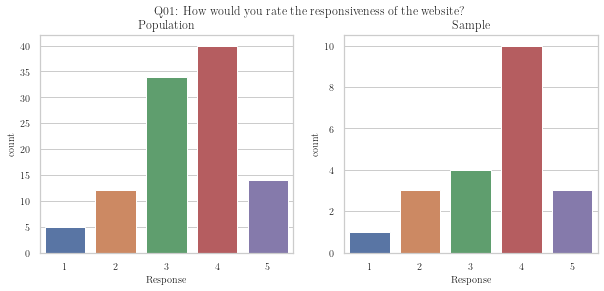

The proportion of 4s and 5s in the sample for question 1 is 0.62 and that in the population is 0.51
The Z score is 0.96 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "How would you rate the responsiveness of the website?"


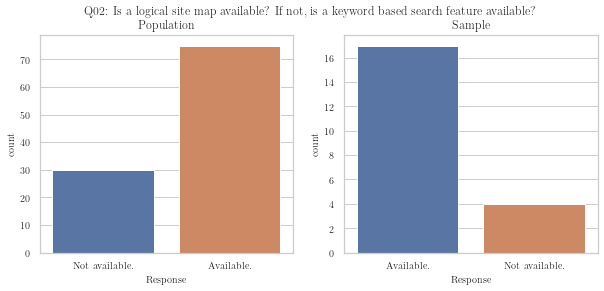

The proportion of positives in the sample for question 2 is 0.81 and that in the population is 0.71
The Z score is 0.97 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Is a logical site map available? If not, is a keyword based search feature available?"


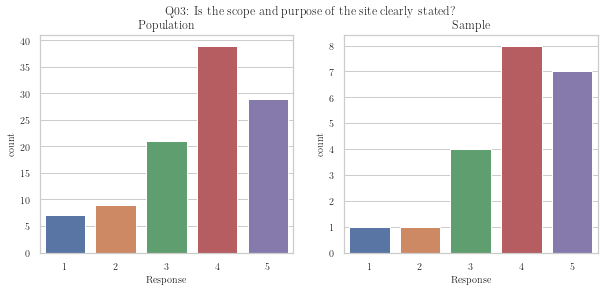

The proportion of 4s and 5s in the sample for question 3 is 0.71 and that in the population is 0.65
The Z score is 0.64 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Is the scope and purpose of the site clearly stated?"


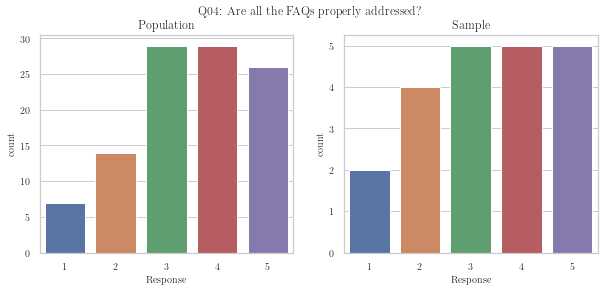

The proportion of 4s and 5s in the sample for question 4 is 0.48 and that in the population is 0.52
The Z score is -0.44 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered negatively to the question: "Are all the FAQs properly addressed?"


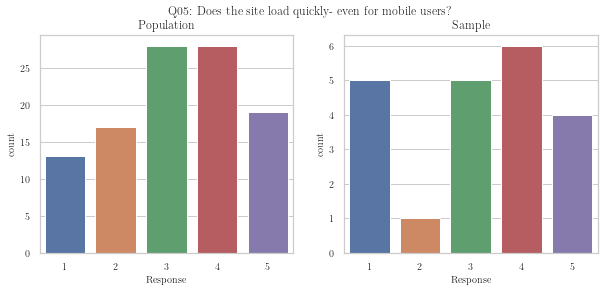

The proportion of 4s and 5s in the sample for question 5 is 0.48 and that in the population is 0.45
The Z score is 0.26 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered negatively to the question: "Does the site load quickly- even for mobile users?"


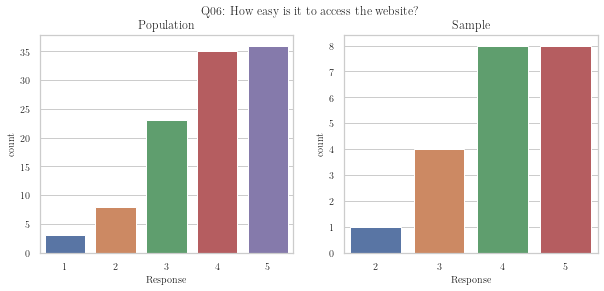

The proportion of 4s and 5s in the sample for question 6 is 0.76 and that in the population is 0.68
The Z score is 0.84 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "How easy is it to access the website?"


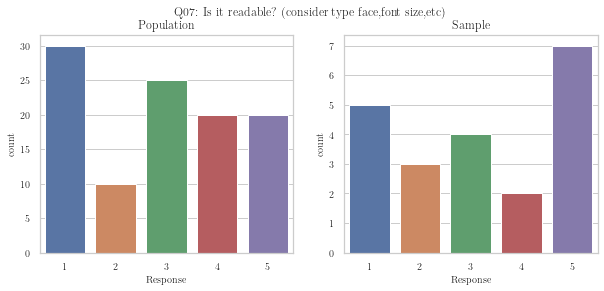

The proportion of 4s and 5s in the sample for question 7 is 0.43 and that in the population is 0.38
The Z score is 0.45 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered negatively to the question: "Is it readable? (consider type face,font size,etc)"


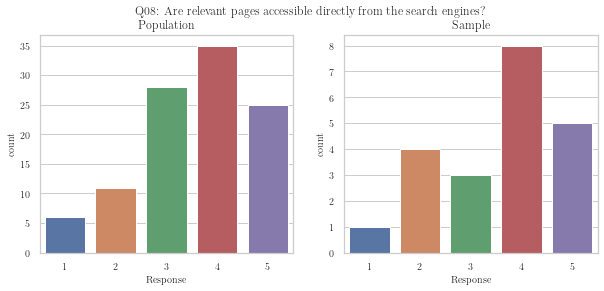

The proportion of 4s and 5s in the sample for question 8 is 0.62 and that in the population is 0.57
The Z score is 0.44 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Are relevant pages accessible directly from the search engines?"


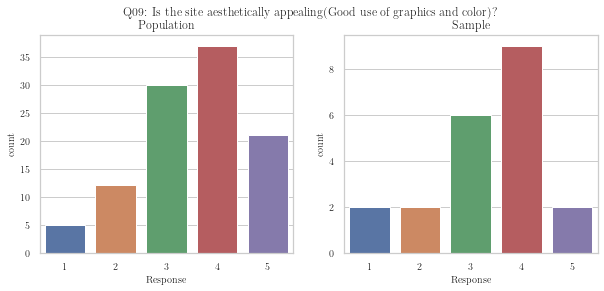

The proportion of 4s and 5s in the sample for question 9 is 0.52 and that in the population is 0.55
The Z score is -0.26 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Is the site aesthetically appealing(Good use of graphics and color)?"


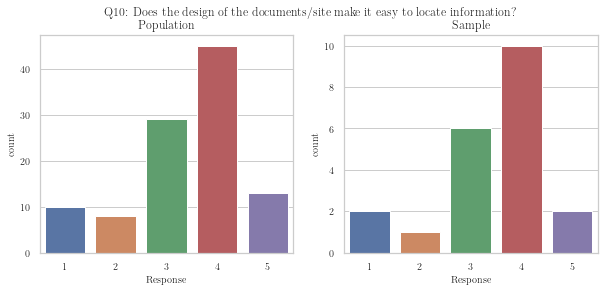

The proportion of 4s and 5s in the sample for question 10 is 0.57 and that in the population is 0.55
The Z score is 0.18 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Does the design of the documents/site make it easy to locate information?"


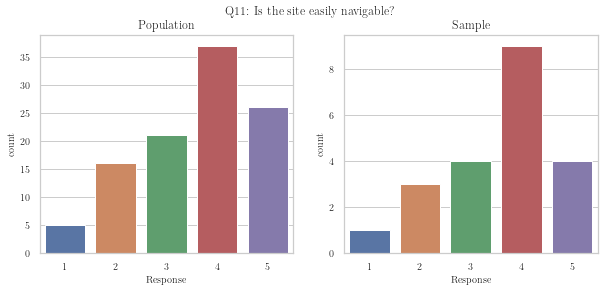

The proportion of 4s and 5s in the sample for question 11 is 0.62 and that in the population is 0.60
The Z score is 0.18 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Is the site easily navigable?"


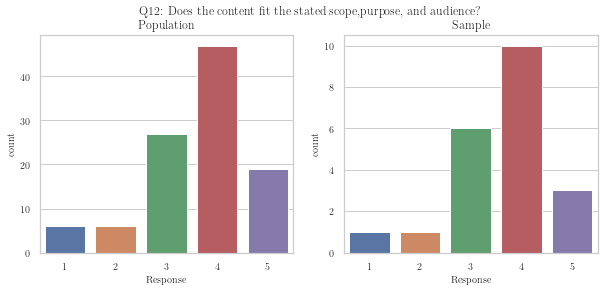

The proportion of 4s and 5s in the sample for question 12 is 0.62 and that in the population is 0.63
The Z score is -0.09 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Does the content fit the stated scope,purpose, and audience?"


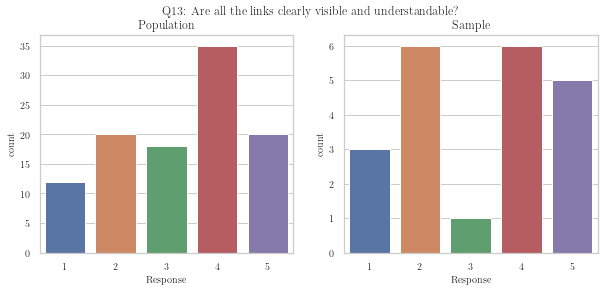

The proportion of 4s and 5s in the sample for question 13 is 0.52 and that in the population is 0.52
The Z score is 0.00 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Are all the links clearly visible and understandable?"


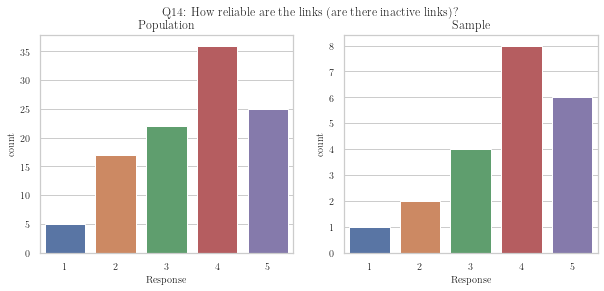

The proportion of 4s and 5s in the sample for question 14 is 0.67 and that in the population is 0.58
The Z score is 0.80 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "How reliable are the links (are there inactive links)?"


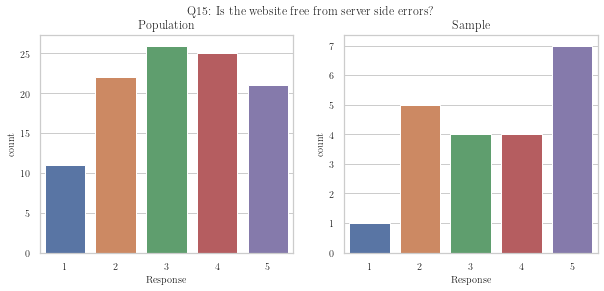

The proportion of 4s and 5s in the sample for question 15 is 0.52 and that in the population is 0.44
The Z score is 0.79 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Is the website free from server side errors?"


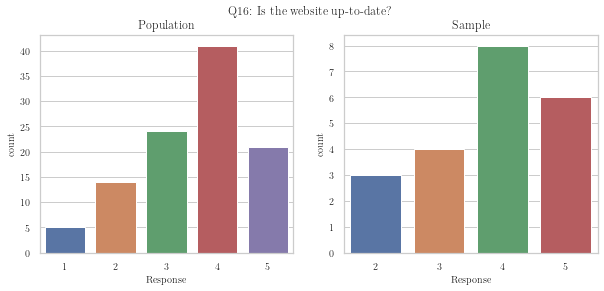

The proportion of 4s and 5s in the sample for question 16 is 0.67 and that in the population is 0.59
The Z score is 0.71 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Is the website up-to-date?"


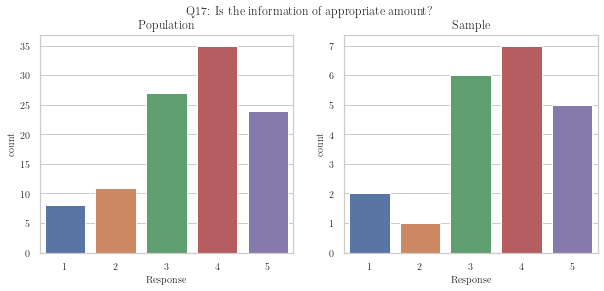

The proportion of 4s and 5s in the sample for question 17 is 0.57 and that in the population is 0.56
The Z score is 0.09 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "Is the information of appropriate amount?"


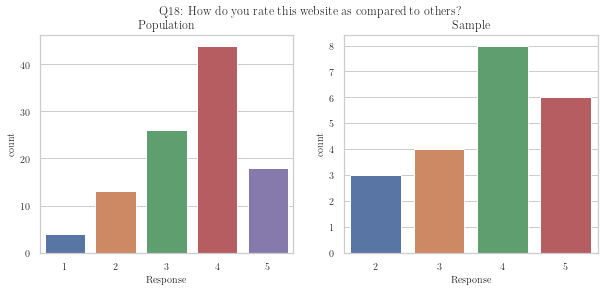

The proportion of 4s and 5s in the sample for question 18 is 0.67 and that in the population is 0.59
The Z score is 0.71 whereas tabulated Z is 1.96
The sample is not significantly different from the population.
The majority of the population answered positively to the question: "How do you rate this website as compared to others? "


In [7]:
from math import fabs


p = np.zeros(len(df2.columns))
p0 = np.zeros(len(df2.columns))

for i in range(1, len(df2.columns)+1):
    visualize_data(df2, df3, i, Ques[i])

    if i != 2: # becuase the second question is logical
        # count the number of 4s and 5s in the sample
        Sum0 = df3[i].value_counts()[4] + df3[i].value_counts()[5]
        p0 = Sum0/df3.shape[0]
        # count the number of 4s and 5s in the population
        Sum = df2[i].value_counts()[4] + df2[i].value_counts()[5]
        p = Sum/df2.shape[0]
        print("The proportion of 4s and 5s in the sample for question %d is %2.2f and that in the population is %2.2f" % (i, p0, p))
    else:
        # count the number of 4s and 5s in the sample
        Sum0 = df3[i].value_counts()['Available.']
        p0 = Sum0/df3.shape[0]
        # count the number of 4s and 5s in the population
        Sum = df2[i].value_counts()['Available.']
        p = Sum/df2.shape[0]
        print("The proportion of positives in the sample for question %d is %2.2f and that in the population is %2.2f" % (i, p0, p))

    Z = (p0 - p)/np.sqrt(p*(1-p)/df3.shape[0])
    print("The Z score is %2.2f whereas tabulated Z is %2.2f" % (Z, 1.96))
    if fabs(Z) > 1.96:
        print("The sample is significantly different from the population.")
    else:
        print("The sample is not significantly different from the population.")
        if p0 > 0.5:
            print("The majority of the population answered positively to the question: \"%s\"" % Ques[i])
        else:
            print("The majority of the population answered negatively to the question: \"%s\"" % Ques[i])
